# My first data analysis project

In [1]:
# importing packages
import fireducks.pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

## Loading the Titanic dataset

In [2]:
titanic_file_path="datasets/train.csv"
df = pd.read_csv(titanic_file_path)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


## Describing the dataframe

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data types of each column

In [5]:
df.info()

<class 'fireducks.pandas.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Counting missing values

In [6]:
df.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handling missing values

### filling the na values in the age
* filling age with its median for null values

In [7]:
median_age = df['Age'].median()
# df['Age'].isnull().sum()
df.fillna(median_age,inplace=True)
df['Age'].isnull().sum()

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,28,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,28,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,28,S


### Dropping the cabin column as it has about 77% of data are missing

In [8]:
df.drop('Cabin',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Duplicated values

In [11]:
df.duplicated().sum()

np.int64(0)

### Distribution of Ages

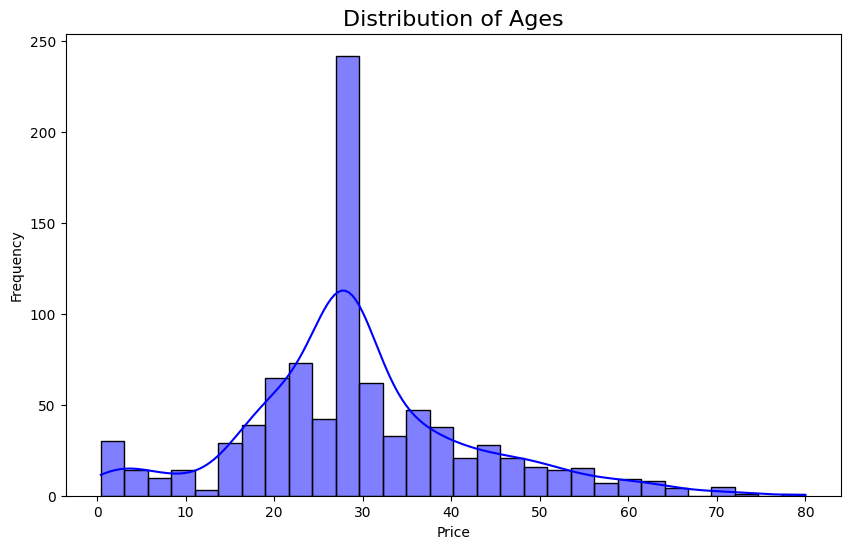

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],kde=True,color='blue',bins=30)
plt.title('Distribution of Ages',fontsize=16)
plt.xlabel('Price')
plt.ylabel("Frequency")
plt.show()

* Shows a slight +ve skewness

### Scatter plot

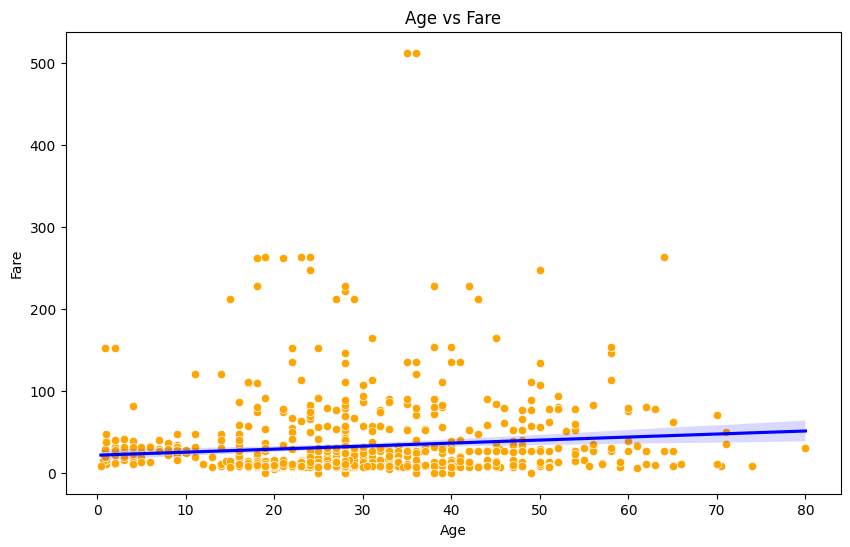

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Fare',data=df,color='orange')
sns.regplot(x='Age',y='Fare',data=df,scatter=False,color='blue')
plt.title('Age vs Fare')
plt.show()

### Distribution of Fares

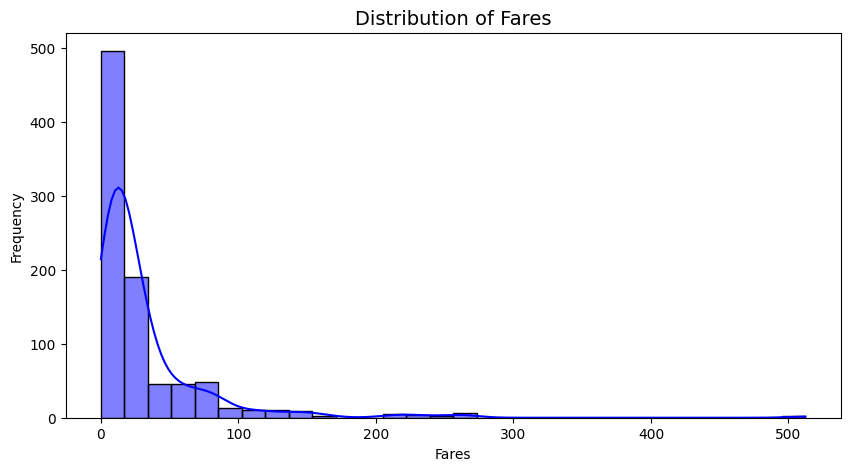

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['Fare'],kde=True,color='blue',bins=30)
plt.title('Distribution of Fares',fontsize=14)
plt.xlabel('Fares')
plt.ylabel('Frequency')
plt.show()

* shows highly +ve skewness

### Survival Rate 

In [15]:
survival_counts = df['Survived'].value_counts()
total_passengers = len(df)
survived = survival_counts[1]
died = survival_counts[0]
# survival_counts

print(f"Total Passengers: {total_passengers}")
print(f"Survived: {survived}")
print(f"Died: {died}")
print(f"Survival Rate: {survived/total_passengers:.2%}")

Total Passengers: 891
Survived: 342
Died: 549
Survival Rate: 38.38%


### Visulaization of Survival Rate

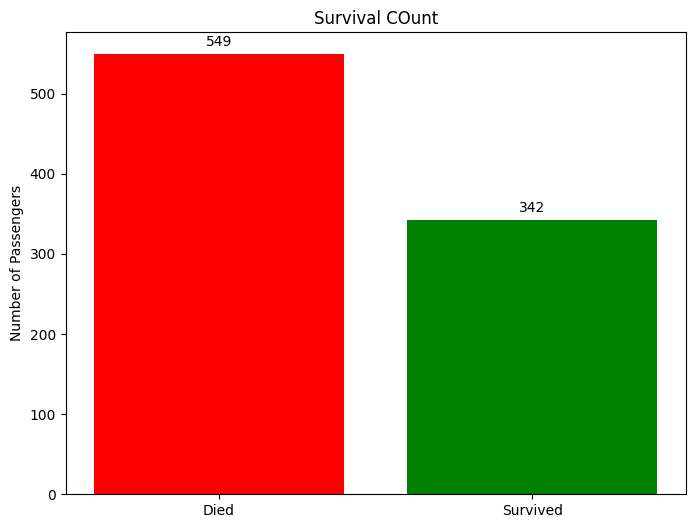

In [16]:
plt.figure(figsize=(8,6))
survival_counts = df['Survived'].value_counts()
labels = ['Died','Survived']
plt.bar(labels,survival_counts.values,color=['red','green'])
plt.title('Survival COunt')
plt.ylabel('Number of Passengers')
for i,v in enumerate(survival_counts.values):
    plt.text(i,v+10,str(v),ha='center')
plt.show()

### Did higher percentage of men or women survived?

In [17]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [18]:
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])
# This labelEncoder will encode the male -> 1 and female-> 0

df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1


### Male Survival Rate

In [19]:
total_male = df.Sex_encoded.loc[df.Sex_encoded== 1].count()
male_survived = df.Sex_encoded.loc[(df.Sex_encoded==1) & df.Survived == 1 ].count()

print(f"Total male passengers:{total_male}")
print(f"Survived Male passengers:{male_survived}")
print(f"Male Passenger Survival Rate: {male_survived/total_male:.2%}")

Total male passengers:577
Survived Male passengers:109
Male Passenger Survival Rate: 18.89%


### Female Survival Rate

In [20]:
total_female = df.Sex_encoded.loc[df.Sex_encoded == 0].count()
female_survived = df.Sex_encoded.loc[(df.Sex_encoded ==0)&df.Survived ==1].count()

print(f"Total Female Passengers: {total_female}")
print(f"Total Female Passenger Survived: {female_survived}")
print(f"Female Passenger Survival Rate: {female_survived/total_female:.2%}")

Total Female Passengers: 314
Total Female Passenger Survived: 233
Female Passenger Survival Rate: 74.20%


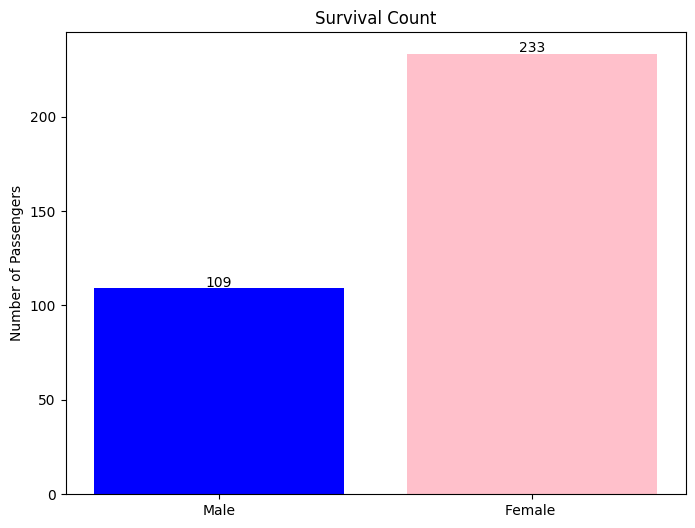

In [21]:
plt.figure(figsize=(8,6))

labels = ['Male','Female ']
plt.bar(labels,[male_survived,female_survived],color=['blue','pink'])
plt.title('Survival Count')
plt.ylabel('Number of Passengers')
for i,v in enumerate([male_survived,female_survived]):
    plt.text(i,v+1,str(v),ha='center')
plt.show()

### Conclusion:
Looks like Female Passenger Survived more than that of Male Passengers

# Did people in certain passenger classes (Pclass) have a higher chance of survival?

In [23]:
total_pclass3 = df.Pclass.loc[df.Pclass == 3].count()
total_pclass2 = df.Pclass.loc[df.Pclass == 2].count()
total_pclass1 = df.Pclass.loc[df.Pclass == 1].count()

print(f"Total Passenger in Class 3: {total_pclass3}")
print(f"Total Passenger in Class 2: {total_pclass2}")
print(f"Total Passenger in Class 1: {total_pclass1}")

total_passenger_survived_p3 = df.Pclass.loc[(df.Pclass==3)&(df.Survived==1)].count()
total_passenger_survived_p2 = df.Pclass.loc[(df.Pclass==2)&(df.Survived==1)].count()
total_passenger_survived_p1 = df.Pclass.loc[(df.Pclass==1)&(df.Survived==1)].count()

print(f"Survival rate of Passenger in Pclass 3: {total_passenger_survived_p3/total_pclass3:.2%}")
print(f"Survival rate of Passenger in Pclass 2: {total_passenger_survived_p2/total_pclass2:.2%}")
print(f"Survival rate of Passenger in Pclass 1: {total_passenger_survived_p1/total_pclass1:.2%}")

Total Passenger in Class 3: 491
Total Passenger in Class 2: 184
Total Passenger in Class 1: 216
Survival rate of Passenger in Pclass 3: 24.24%
Survival rate of Passenger in Pclass 2: 47.28%
Survival rate of Passenger in Pclass 1: 62.96%


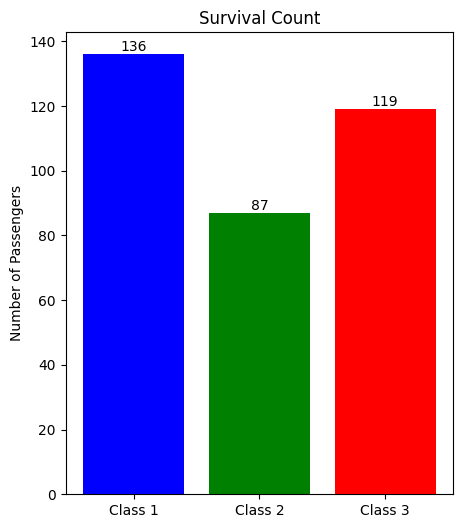

In [44]:
plt.figure(figsize=(5,6))

labels = ['Class 1','Class 2','Class 3']
plt.bar(labels,[total_passenger_survived_p1,total_passenger_survived_p2,total_passenger_survived_p3],color=['blue','green','red'])
plt.title('Survival Count')
plt.ylabel('Number of Passengers')
for i,v in enumerate([total_passenger_survived_p1,total_passenger_survived_p2,total_passenger_survived_p3]):
    plt.text(i,v+1,str(v),ha='center')
plt.show()

### Coclusion: 

* seems like class 1 passenger has higher survival rate

# Building Machine Learning Model

In [31]:
features = ['Pclass','Sex_encoded','Age','Fare']
X = df[features]
y = df['Survived']

## Splitting the data

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

## fitting the model (Regression Model)

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Prediction from the model

In [43]:
y_pred = model.predict(X_test)

## Evaluation 

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error,accuracy_score,confusion_matrix
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"R2 score: {r2:.2f}")
print(f"mae score: {mae:.2f}")

R2 score: 0.43
mae score: 0.29


In [39]:
import joblib

joblib.dump(model,"ML_model/Linear_regression.pkl")

['ML_model/Linear_regression.pkl']